# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

from scipy.stats import normaltest
from scipy.stats import kruskal
import category_encoders as ce
from sklearn.compose import ColumnTransformer
import plotly.express as px


# Data

In [2]:
car_models = ['audi', 'bmw', 'cclass', 'focus', 'ford', 'hyundi', 'merc', 'skoda', 'toyota', 'vauxhall', 'vw']
df = pd.DataFrame()

for i in car_models:
    carmodel_df = pd.read_csv('dataset/'+i+'.csv')
    if i == 'hyundi':
        carmodel_df = carmodel_df.rename(columns={'tax(£)': 'tax'})

    carmodel_df['brand']=i
    df = pd.concat([df, carmodel_df])
    

In [3]:
# reset ulang index, karena index masih menggunakan index dataframe sebelum digabung
df = df.reset_index()

In [4]:
# drop index lama
df = df.drop(columns='index')
df

model  year  price transmission  mileage fuelType    tax   mpg  \
0         A1  2017  12500       Manual    15735   Petrol  150.0  55.4   
1         A6  2016  16500    Automatic    36203   Diesel   20.0  64.2   
2         A1  2016  11000       Manual    29946   Petrol   30.0  55.4   
3         A4  2017  16800    Automatic    25952   Diesel  145.0  67.3   
4         A3  2019  17300       Manual     1998   Petrol  145.0  49.6   
...      ...   ...    ...          ...      ...      ...    ...   ...   
108535   Eos  2012   5990       Manual    74000   Diesel  125.0  58.9   
108536   Fox  2008   1799       Manual    88102   Petrol  145.0  46.3   
108537   Fox  2009   1590       Manual    70000   Petrol  200.0  42.0   
108538   Fox  2006   1250       Manual    82704   Petrol  150.0  46.3   
108539   Fox  2007   2295       Manual    74000   Petrol  145.0  46.3   

        engineSize brand  
0              1.4  audi  
1              2.0  audi  
2              1.4  audi  
3              2.0  audi  
4              1.0  audi  
...            ...   ...  
108535         2.0    vw  
108536         1.2    vw  
108537         1.4    vw  
108538         1.2    vw  
108539         1.2    vw  

[108540 rows x 10 columns]

- model = tipe mobil.
- year = tahun produksi mobil.
- price = nilai harga jual mobil.
- transmission = tipe transmisi dari mobil.
- mileage = total jarak yang telah ditempuh oleh mobil.
- fuelType = jenis bahan bakar yang digunakan pada mobil.
- tax = nilai pajak mobil.
- mpg = miles per gallon; total jarak tempuh mobil berdasarkan total konsumsi bahan bakar yg digunakan. semakin besar nilai mpg berarti konsumsi bahan bakar yg digunakan akan semakin sedikit (semakin irit).
- engine size = engine capacity atau engine displacement (kapasitas mesin); volume total silinder mesin. secara umum, semakin besar nilai kapasitas mesin akan meningkatkan kebutuhan konsumsi bahan bakar (kendaraan akan semakin boros).

# EDA

## Deskripsi Statistik

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   tax           99187 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    108540 non-null  float64
 9   brand         108540 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 8.3+ MB


In [6]:
df.describe(include=object)

model transmission fuelType   brand
count   108540       108540   108540  108540
unique     195            4        5      11
top      Focus       Manual   Petrol    ford
freq     10042        61308    59875   17965

In [7]:
df.isna().sum() / df.shape[0] * 100

model           0.0000
year            0.0000
price           0.0000
transmission    0.0000
mileage         0.0000
fuelType        0.0000
tax             8.6171
mpg             8.6171
engineSize      0.0000
brand           0.0000
dtype: float64

In [8]:
df.describe()

year          price        mileage           tax  \
count  108540.000000  108540.000000  108540.000000  99187.000000   
mean     2017.098028   16890.124046   23025.928469    120.299838   
std         2.130057    9756.266820   21176.423684     63.150926   
min      1970.000000     450.000000       1.000000      0.000000   
25%      2016.000000   10229.500000    7491.750000    125.000000   
50%      2017.000000   14698.000000   17265.000000    145.000000   
75%      2019.000000   20940.000000   32236.000000    145.000000   
max      2060.000000  159999.000000  323000.000000    580.000000   

                mpg     engineSize  
count  99187.000000  108540.000000  
mean      55.166825       1.661644  
std       16.138522       0.557058  
min        0.300000       0.000000  
25%       47.100000       1.200000  
50%       54.300000       1.600000  
75%       62.800000       2.000000  
max      470.800000       6.600000

> dari data diatas, dapat kita lihat bahwa engineSize memiliki nilai minimum 0, dimana hal tersebut tidak mungkin karena tidak ada kendaraan dengan engineSize = 0

## Handling Anomali Data

### Data 'year' = 2060

In [9]:
df[df['year'] == 2060]

model  year  price transmission  mileage fuelType    tax   mpg  \
48528   Fiesta  2060   6495    Automatic    54807   Petrol  205.0  42.8   

       engineSize brand  
48528         1.4  ford

In [10]:
df.drop(df[df['year'] == 2060].index, inplace = True)

In [11]:
df.describe()

year          price        mileage           tax  \
count  108539.000000  108539.000000  108539.000000  99186.000000   
mean     2017.097633   16890.219820   23025.635661    120.298984   
std         2.126083    9756.260741   21176.301513     63.150672   
min      1970.000000     450.000000       1.000000      0.000000   
25%      2016.000000   10230.000000    7491.500000    125.000000   
50%      2017.000000   14698.000000   17265.000000    145.000000   
75%      2019.000000   20940.000000   32236.000000    145.000000   
max      2020.000000  159999.000000  323000.000000    580.000000   

                mpg     engineSize  
count  99186.000000  108539.000000  
mean      55.166950       1.661646  
std       16.138556       0.557060  
min        0.300000       0.000000  
25%       47.100000       1.200000  
50%       54.300000       1.600000  
75%       62.800000       2.000000  
max      470.800000       6.600000

### Data 'engineSize' = 0

In [12]:
df[df['engineSize'] == 0.0].head()

model  year  price transmission  mileage fuelType    tax    mpg  \
7505    Q5  2019  44790    Automatic     5886   Petrol  135.0  117.7   
7506    Q3  2019  32788    Automatic     1500   Diesel  145.0   47.1   
7516    Q3  2020  29944       Manual     1500   Petrol  145.0   40.9   
7517    Q3  2020  33333    Automatic     1500   Diesel  145.0   47.1   
7518    Q3  2020  29944    Automatic     1500   Petrol  145.0   32.5   

      engineSize brand  
7505         0.0  audi  
7506         0.0  audi  
7516         0.0  audi  
7517         0.0  audi  
7518         0.0  audi

In [13]:
df['engineSize'].unique()

array([1.4, 2. , 1. , 3. , 1.6, 1.8, 1.5, 4. , 2.5, 1.2, 4.2, 2.9, 5.2,
       1.9, 2.7, 0. , 3.2, 4.1, 6.3, 0.6, 4.4, 2.2, 5. , 6.6, 2.8, 3.5,
       2.1, 6.2, 3.6, 5.4, 2.6, 2.3, 1.1, 1.3, 1.7, 2.4, 5.5, 4.7, 6. ,
       3.7, 4.3, 4.5])

In [14]:
totalZeroEngine = df[df['engineSize'] == 0.0]['engineSize'].count()
zeroEnginePersentage = totalZeroEngine / df.shape[0] * 100
print('karena hanya terdapat sebanyak', totalZeroEngine, 'data atau sebesar', round(zeroEnginePersentage, 3), '% dari keseluruhan data, maka data dengan engineSize = 0.0 akan didrop')

karena hanya terdapat sebanyak 286 data atau sebesar 0.263 % dari keseluruhan data, maka data dengan engineSize = 0.0 akan didrop


In [15]:
df = df.drop(df[df['engineSize'] == 0.0].index, axis = 0)

## Missing Value

### Handling Missing Value in Tax

* input Missing Value in Tax menggunakan nilai rata-rata berdasarkan fuelType
* referensi:
    1. https://www.gov.uk/calculate-tax-rates-for-new-cars
    2. https://www.gov.uk/vehicle-tax-rate-tables

In [16]:
df

model  year  price transmission  mileage fuelType    tax   mpg  \
0         A1  2017  12500       Manual    15735   Petrol  150.0  55.4   
1         A6  2016  16500    Automatic    36203   Diesel   20.0  64.2   
2         A1  2016  11000       Manual    29946   Petrol   30.0  55.4   
3         A4  2017  16800    Automatic    25952   Diesel  145.0  67.3   
4         A3  2019  17300       Manual     1998   Petrol  145.0  49.6   
...      ...   ...    ...          ...      ...      ...    ...   ...   
108535   Eos  2012   5990       Manual    74000   Diesel  125.0  58.9   
108536   Fox  2008   1799       Manual    88102   Petrol  145.0  46.3   
108537   Fox  2009   1590       Manual    70000   Petrol  200.0  42.0   
108538   Fox  2006   1250       Manual    82704   Petrol  150.0  46.3   
108539   Fox  2007   2295       Manual    74000   Petrol  145.0  46.3   

        engineSize brand  
0              1.4  audi  
1              2.0  audi  
2              1.4  audi  
3              2.0  audi  
4              1.0  audi  
...            ...   ...  
108535         2.0    vw  
108536         1.2    vw  
108537         1.4    vw  
108538         1.2    vw  
108539         1.2    vw  

[108253 rows x 10 columns]

In [17]:
df['tax']=df['tax'].fillna(df.groupby(['fuelType'])['tax'].transform('mean'))

### Handling Missing Value in MPG

* input Missing Value in MPG menggunakan nilai rata-rata berdasarkan transmission, fuelType, engineSize

In [18]:
df['mpg']=df['mpg'].fillna(df.groupby(['transmission','fuelType','engineSize'])['mpg'].transform('mean'))

In [19]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             3
engineSize      0
brand           0
dtype: int64

>dikarenakan masih ada data yg bernilai NaN tetapi jumlah data tersebut tidak akan terlalu mempengaruhi keseluruhan data makan data tersebut akan di drop.

In [20]:
df.dropna(inplace=True)

In [21]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
brand           0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108250 entries, 0 to 108539
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108250 non-null  object 
 1   year          108250 non-null  int64  
 2   price         108250 non-null  int64  
 3   transmission  108250 non-null  object 
 4   mileage       108250 non-null  int64  
 5   fuelType      108250 non-null  object 
 6   tax           108250 non-null  float64
 7   mpg           108250 non-null  float64
 8   engineSize    108250 non-null  float64
 9   brand         108250 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 9.1+ MB


## Feature Engineering

### fitur Age

In [23]:
df['age']=2020-df['year']
df

model  year  price transmission  mileage fuelType    tax   mpg  \
0         A1  2017  12500       Manual    15735   Petrol  150.0  55.4   
1         A6  2016  16500    Automatic    36203   Diesel   20.0  64.2   
2         A1  2016  11000       Manual    29946   Petrol   30.0  55.4   
3         A4  2017  16800    Automatic    25952   Diesel  145.0  67.3   
4         A3  2019  17300       Manual     1998   Petrol  145.0  49.6   
...      ...   ...    ...          ...      ...      ...    ...   ...   
108535   Eos  2012   5990       Manual    74000   Diesel  125.0  58.9   
108536   Fox  2008   1799       Manual    88102   Petrol  145.0  46.3   
108537   Fox  2009   1590       Manual    70000   Petrol  200.0  42.0   
108538   Fox  2006   1250       Manual    82704   Petrol  150.0  46.3   
108539   Fox  2007   2295       Manual    74000   Petrol  145.0  46.3   

        engineSize brand  age  
0              1.4  audi    3  
1              2.0  audi    4  
2              1.4  audi    4  
3              2.0  audi    3  
4              1.0  audi    1  
...            ...   ...  ...  
108535         2.0    vw    8  
108536         1.2    vw   12  
108537         1.4    vw   11  
108538         1.2    vw   14  
108539         1.2    vw   13  

[108250 rows x 11 columns]

### fitur Transm (encode dari fitur transmission)

In [24]:
df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [25]:
df['transm']=df['transmission'].map({None:0,'Manual':1,'Automatic':2,'Semi-Auto':3,'Other':4})
df

model  year  price transmission  mileage fuelType    tax   mpg  \
0         A1  2017  12500       Manual    15735   Petrol  150.0  55.4   
1         A6  2016  16500    Automatic    36203   Diesel   20.0  64.2   
2         A1  2016  11000       Manual    29946   Petrol   30.0  55.4   
3         A4  2017  16800    Automatic    25952   Diesel  145.0  67.3   
4         A3  2019  17300       Manual     1998   Petrol  145.0  49.6   
...      ...   ...    ...          ...      ...      ...    ...   ...   
108535   Eos  2012   5990       Manual    74000   Diesel  125.0  58.9   
108536   Fox  2008   1799       Manual    88102   Petrol  145.0  46.3   
108537   Fox  2009   1590       Manual    70000   Petrol  200.0  42.0   
108538   Fox  2006   1250       Manual    82704   Petrol  150.0  46.3   
108539   Fox  2007   2295       Manual    74000   Petrol  145.0  46.3   

        engineSize brand  age  transm  
0              1.4  audi    3       1  
1              2.0  audi    4       2  
2              1.4  audi    4       1  
3              2.0  audi    3       2  
4              1.0  audi    1       1  
...            ...   ...  ...     ...  
108535         2.0    vw    8       1  
108536         1.2    vw   12       1  
108537         1.4    vw   11       1  
108538         1.2    vw   14       1  
108539         1.2    vw   13       1  

[108250 rows x 12 columns]

### fitur Fuel (encode dari fitur fuelType)

In [26]:
df['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], dtype=object)

In [27]:
df['fuel']=df['fuelType'].map({None:0,'Petrol':1,'Diesel':2,'Hybrid':3,'Other':4,'Electric':5})
df

model  year  price transmission  mileage fuelType    tax   mpg  \
0         A1  2017  12500       Manual    15735   Petrol  150.0  55.4   
1         A6  2016  16500    Automatic    36203   Diesel   20.0  64.2   
2         A1  2016  11000       Manual    29946   Petrol   30.0  55.4   
3         A4  2017  16800    Automatic    25952   Diesel  145.0  67.3   
4         A3  2019  17300       Manual     1998   Petrol  145.0  49.6   
...      ...   ...    ...          ...      ...      ...    ...   ...   
108535   Eos  2012   5990       Manual    74000   Diesel  125.0  58.9   
108536   Fox  2008   1799       Manual    88102   Petrol  145.0  46.3   
108537   Fox  2009   1590       Manual    70000   Petrol  200.0  42.0   
108538   Fox  2006   1250       Manual    82704   Petrol  150.0  46.3   
108539   Fox  2007   2295       Manual    74000   Petrol  145.0  46.3   

        engineSize brand  age  transm  fuel  
0              1.4  audi    3       1     1  
1              2.0  audi    4       2     2  
2              1.4  audi    4       1     1  
3              2.0  audi    3       2     2  
4              1.0  audi    1       1     1  
...            ...   ...  ...     ...   ...  
108535         2.0    vw    8       1     2  
108536         1.2    vw   12       1     1  
108537         1.4    vw   11       1     1  
108538         1.2    vw   14       1     1  
108539         1.2    vw   13       1     1  

[108250 rows x 13 columns]

## Data Visualization (in general)

### Price Distribution

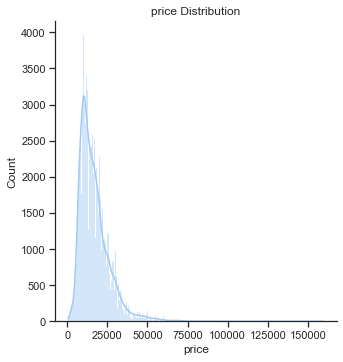

In [28]:
# plt.figure(figsize=(15,8))
sns.displot(df['price'],kde=True) 
plt.title('price Distribution')
plt.show()

### jumlah mobil tiap masing2 tahun

### Percentage of Transmission Type

In [29]:
df_tr=df.groupby('transmission').count()['model'].reset_index()
df_tr= df_tr.rename(columns={'model': 'jumlah'})
df_tr

transmission  jumlah
0    Automatic   22202
1       Manual   61137
2        Other       8
3    Semi-Auto   24903

In [30]:
fig = px.pie(df_tr,
            names='transmission',
            values='jumlah',
            title='Percentage of Transmission Type',
            color_discrete_sequence=px.colors.sequential.amp
            )
# fig = go.Figure(data=[go.Pie(labels=df_tr['transmission'], values=df_tr['jumlah'], hole=.65)])
fig.show()

### Percentage of fuelType

In [31]:
df_ft=df.groupby('fuelType').count()['model'].reset_index()
df_ft= df_ft.rename(columns={'model': 'jumlah'})
df_ft

fuelType  jumlah
0    Diesel   45103
1  Electric       4
2    Hybrid    3191
3     Other     252
4    Petrol   59700

In [32]:
fig = px.pie(df_ft,
            names='fuelType',
            values='jumlah',
            title='Percentage of fuelType',
            color_discrete_sequence=px.colors.sequential.Peach
            )
fig.show()

### Tree Map

In [33]:
model_count=df
ax2= px.treemap(model_count,path=["model"],title='Mobil Bekas Paling Populer:')
ax2.show()

In [34]:
df_treemap = df.groupby(['year','transmission','fuelType']).agg({'model':len,'price':np.mean}).rename(columns={'name':'total'}).reset_index()
df_treemap

year transmission fuelType  model         price
0    1970       Manual   Petrol      1  10495.000000
1    1991    Automatic   Petrol      1   4450.000000
2    1996    Automatic   Petrol      1   5995.000000
3    1996       Manual   Petrol      1   3000.000000
4    1997    Automatic   Petrol      2   7322.500000
..    ...          ...      ...    ...           ...
167  2020       Manual    Other      5  20226.400000
168  2020       Manual   Petrol   1416  18134.800141
169  2020    Semi-Auto   Diesel   1022  36690.132094
170  2020    Semi-Auto   Hybrid    106  32677.254717
171  2020    Semi-Auto   Petrol   1064  32442.779135

[172 rows x 5 columns]

In [35]:
fig = px.treemap(df_treemap,
                 path=['year','transmission','fuelType'], 
                 values = 'price', 
                 color = 'price',
                 color_continuous_scale='RdBu',
                 color_continuous_midpoint=np.average(df['price'], weights=df['price']),
                 width=1000,
                 height=600,
                 title = "Nilai Rata-Rata price berdasarkan year, transmission, dan fuelType:"
                 )
fig.show()

### Time Series

ref gambar nanti time series:
    
    https://www.moneysupermarket.com/car-insurance/petrol-vs-diesel/?__cf_chl_jschl_tk__=pmd_gyDQZeymIJ8ilTuI76rL9Flxin2tASMb5MaXlCu5JIE-1630055221-0-gqNtZGzNAjujcnBszQi9

## Summary Statistic
(terhadap variabel-variabel yg berpotensi memengaruhi Nilai _price_)

### Cek Normalisasi Data

In [36]:
num_features=list(df.dtypes[df.dtypes!=object].index)
num_features.remove('year')
num_features

['price', 'mileage', 'tax', 'mpg', 'engineSize', 'age', 'transm', 'fuel']

In [37]:
factors = df[num_features]

In [38]:
for i in factors:
    stats,pval=normaltest(factors[i])
    print('Nilai p-Value =',pval)
    if pval <= 0.05:
        print(f'Fitur {i} distribusi tidak normal\n')
    else:
        print(f'Fitur {i} distribusi normal\n')

Nilai p-Value = 0.0
Fitur price distribusi tidak normal

Nilai p-Value = 0.0
Fitur mileage distribusi tidak normal

Nilai p-Value = 0.0
Fitur tax distribusi tidak normal

Nilai p-Value = 0.0
Fitur mpg distribusi tidak normal

Nilai p-Value = 0.0
Fitur engineSize distribusi tidak normal

Nilai p-Value = 0.0
Fitur age distribusi tidak normal

Nilai p-Value = 0.0
Fitur transm distribusi tidak normal

Nilai p-Value = 0.0
Fitur fuel distribusi tidak normal



### Cek Korelasi Data

In [39]:
num_features=list(df.dtypes[df.dtypes!=object].index)
num_features.remove('year')
num_features

['price', 'mileage', 'tax', 'mpg', 'engineSize', 'age', 'transm', 'fuel']

In [40]:
corr_matrix=df[num_features].corr(method='spearman')
corr_matrix

price   mileage       tax       mpg  engineSize       age  \
price       1.000000 -0.523804  0.302649 -0.390004    0.576746 -0.606563   
mileage    -0.523804  1.000000 -0.276971  0.331991    0.103280  0.814010   
tax         0.302649 -0.276971  1.000000 -0.564331    0.137124 -0.338549   
mpg        -0.390004  0.331991 -0.564331  1.000000   -0.205922  0.315391   
engineSize  0.576746  0.103280  0.137124 -0.205922    1.000000  0.041088   
age        -0.606563  0.814010 -0.338549  0.315391    0.041088  1.000000   
transm      0.600375 -0.156525  0.157264 -0.224465    0.516534 -0.185427   
fuel        0.274054  0.193638 -0.173207  0.399929    0.623366  0.101986   

              transm      fuel  
price       0.600375  0.274054  
mileage    -0.156525  0.193638  
tax         0.157264 -0.173207  
mpg        -0.224465  0.399929  
engineSize  0.516534  0.623366  
age        -0.185427  0.101986  
transm      1.000000  0.275859  
fuel        0.275859  1.000000

* 0-0.3 = weak correlation
* 0.3-0.7 = moderate correlation
* 0.7-1 = strong correlation

* Positive (+) = one variable increases as the other increases the correlation
* Negative (-) = when one decreases as the other increases it
* Complete absence of correlation is represented by 0

Ref: materi Association

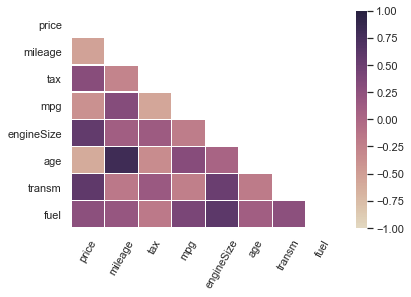

In [41]:
# plt.figure(figsize=(12,8))

sns.set_theme(style="white")

mask=np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

sns.heatmap(corr_matrix,
            mask=mask,
            cmap=cmap,
            vmax=1,
            vmin=-1,
            linewidths=.2
           )

plt.yticks(rotation=0)
plt.xticks(rotation=60)
plt.show()

### Cek Distribusi Data

In [42]:
kolom=df.columns

In [43]:
len(kolom)

13

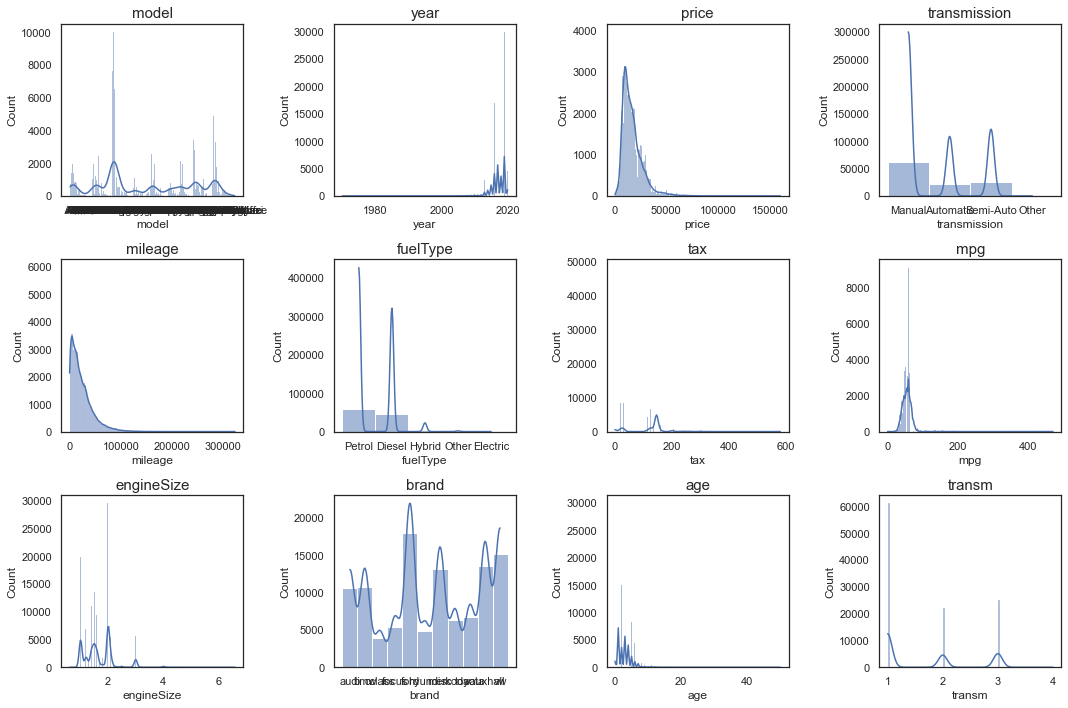

In [44]:
figure, axis = plt.subplots(3,4,figsize=(15,10))

k=0

for i in range(0,3):
    for j in range (0,4):
        axis[i,j].set_title(kolom[k], size=15)
        sns.histplot(ax=axis[i,j], data = df, x=kolom[k], kde=True)
        k+=1

# auto padding subplot
plt.tight_layout()
plt.show()

* berdasarkan histplot, sebaran data feature cenderung *right-skew* kecuali pada data _mpg_
* dapat disimpulkan secara umum persebaran data memiliki distribusi tidak normal.

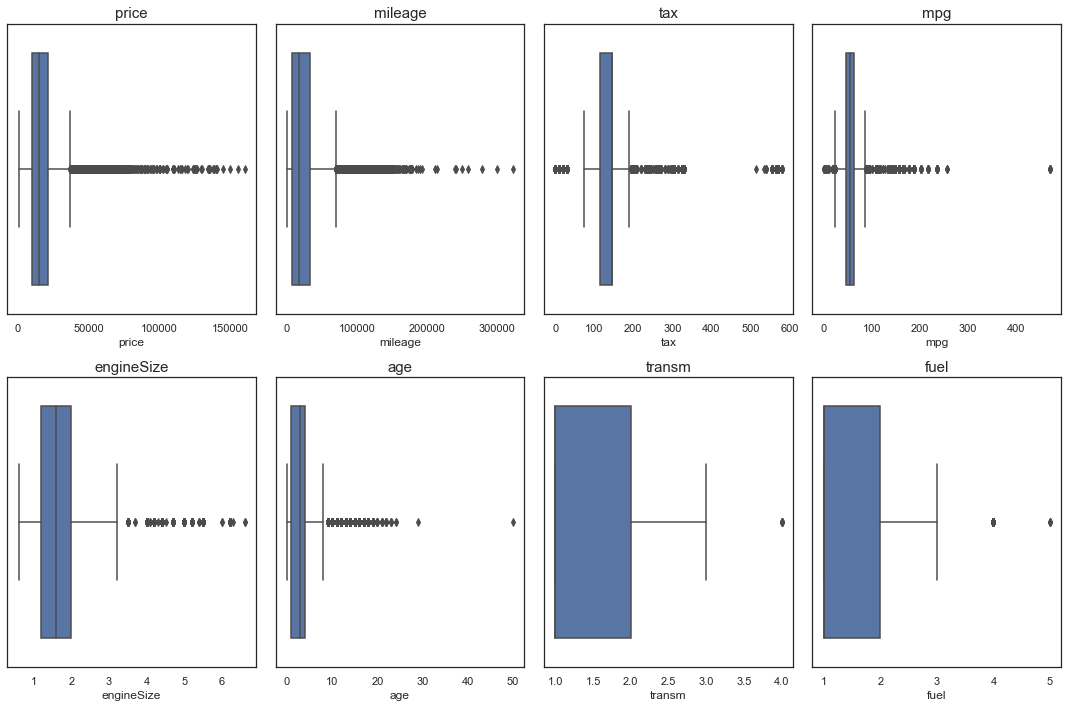

In [45]:
figure, axis = plt.subplots(2,4,figsize=(15,10))

k=0

for i in range(0,2):
    for j in range (0,4):
        axis[i,j].set_title(num_features[k], size=15)
        sns.boxplot(ax=axis[i,j], data = df, x=num_features[k])
        k+=1

# auto padding subplot
plt.tight_layout()
plt.show()

* berdasarkan boxplot, sebaran data feature memiliki banyak outlier di sebelah kanan.
* dapat disimpulkan persebaran data memiliki distribusi tidak normal.

### Uji Analisa

#### Uji 1 : _price_ vs _mileage_

**Korelasi :**

In [46]:
round(df['price'].corr(df['mileage'],method='spearman'),6)

-0.523804

**Analisa Korelasi :**

* Fitur _price_ memiliki korelasi **moderate** serta **berbanding terbalik** dengan fitur _mileage_, dimana nilai korelasinya adalah 0.523735 dengan arah negatif.
* Berdasarkan hal ini dapat dikatakan bahwa **semakin tinggi nilai _mileage_** dari mobil akan menyebabkan **nilai _price_ semakin rendah**.

**Visualisasi :**

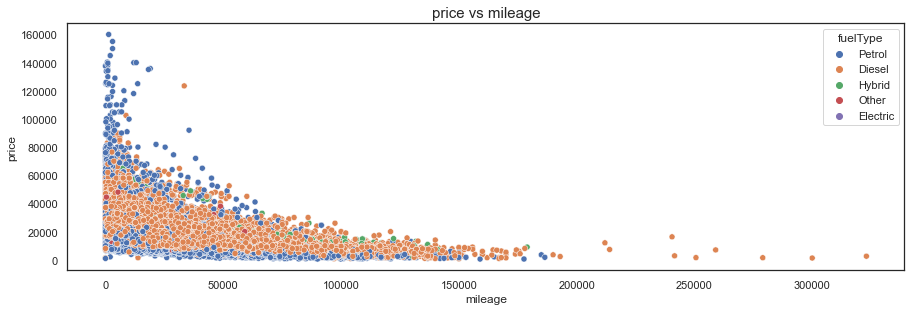

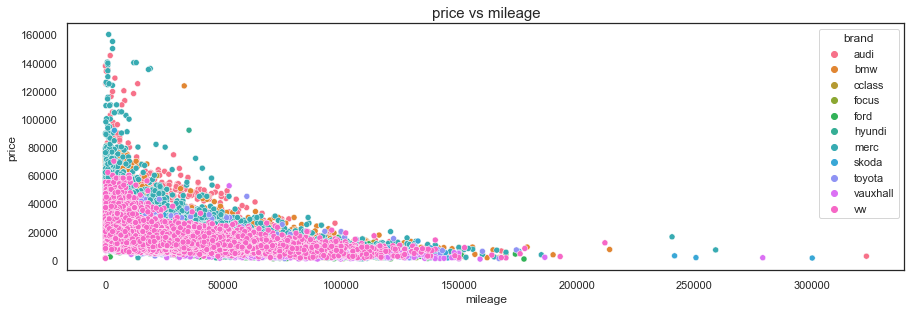

In [89]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.scatterplot(data=df, x='mileage', y='price', hue='fuelType')
plt.title('price vs mileage', size=15)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
sns.scatterplot(data=df, x='mileage', y='price', hue='brand')
plt.title('price vs mileage', size=15)
plt.show()

**Kesimpulan Uji 1 :**

1. Total jarak yg telah ditempuh memiliki pengaruh terhadap penentuan harga jual mobil, dimana semakin tinggi total jarak tempuh yg telah dilakukan mobil maka nilai jual mobil akan semakin rendah.
2. Pada data ini, secara umum digambarkan bahwa:
    * mobil yg memiliki harga jual tinggi adalah mobil dengan nilai jarak tempuh yg rendah dengan tipe bahan bakar bakar Petrol.
    * mobil yg memiliki harga jual rendah adalah mobil dengan jarak tempuh yg tinggi dengan tipe bahan bakar Diesel.

#### Uji 2 : _price_ vs _tax_

**Korelasi :**

In [48]:
round(df['price'].corr(df['tax'],method='spearman'),6)

0.302649

**Analisa Korelasi :**

* Fitur _price_ memiliki korelasi **moderate** serta **berbanding Lurus** dengan fitur _tax_, dimana nilai korelasinya adalah 0.302153 dengan arah positif.
* Berdasarkan hal ini dapat dikatakan bahwa **semakin tinggi nilai _tax_** dari mobil akan menyebabkan **nilai _price_ semakin tinggi**.

**Visualisasi :**

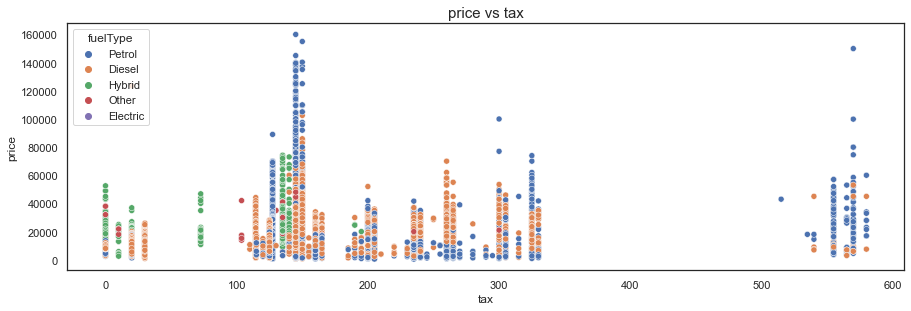

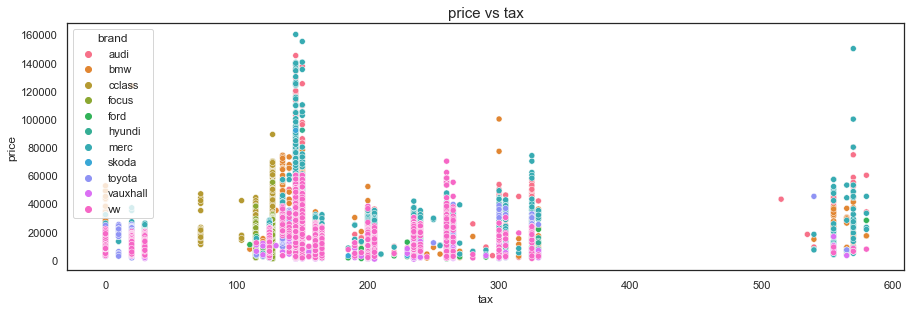

In [93]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.scatterplot(data=df, x='tax', y='price', hue='fuelType')
plt.title('price vs tax', size=15)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
sns.scatterplot(data=df, x='tax', y='price', hue='brand')
plt.title('price vs tax', size=15)
plt.show()

**Kesimpulan Uji 2 :**

1. Nilai pajak mobil memiliki pengaruh kecil terhadap penentuan harga jual mobil.
2. Pada data ini, secara umum digambarkan bahwa:
    * Mobil dengan jenis bahan bakar _Hybrid_ dan _Other_ memiliki rata-rata nilai _tax_ serta nilai _price_ yg relatif lebih rendah dibandingkan mobil dengan jenis bahan bakar lainnya. 
    * Mobil dengan jenis bahan bakar _Diesel_ memiliki rata-rata nilai _tax_ relatif rendah hingga tinggi tetapi memiliki  nilai _price_ yg relatif tidak terlalu tinggi. 
    * Mobil dengan jenis bahan bakar _Petrol_ memiliki rata-rata nilai _tax_ dan nilai _price_ yg variatif; rendah hingga tinggi.

#### Uji 3 : _price_ vs _mpg_

**Korelasi :**

In [50]:
round(df['price'].corr(df['mpg'],method='spearman'),6)

-0.390004

**Analisa Korelasi :**

* Fitur _price_ memiliki korelasi **moderate** serta **berbanding terbalik** dengan fitur _mpg_, dimana nilai korelasinya adalah 0.393475 dengan arah negatif.
* Berdasarkan hal ini dapat dikatakan bahwa **semakin tinggi nilai _mpg_** dari mobil akan menyebabkan **nilai _price_ semakin rendah**.

**Visualisasi :**

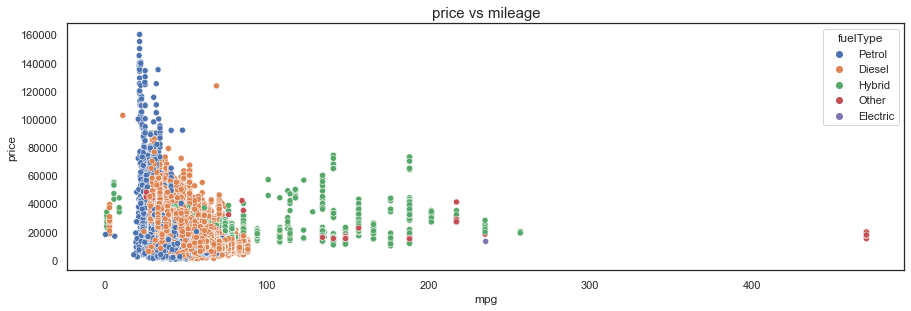

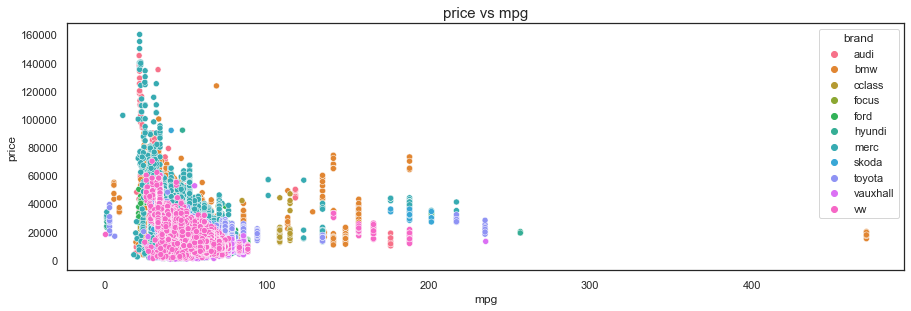

In [90]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.scatterplot(data=df, x='mpg', y='price', hue='fuelType')
plt.title('price vs mileage', size=15)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
sns.scatterplot(data=df, x='mpg', y='price', hue='brand')
plt.title('price vs mpg', size=15)
plt.show()

**Kesimpulan Uji 3 :**

1. Total jarak tempuh mobil berdasarkan total konsumsi bahan bakar yg digunakan memiliki pengaruh kecil terhadap penentuan harga jual mobil.
2. Pada data ini, secara umum digambarkan bahwa:
    * mobil dengan tipe bahan bakar bakar Petrol memiliki sebaran nilai mpg yg relatif rendah tetapi memiliki range harga jual yg paling variatif; dari harga paling rendah hingga paling tinggi.
    * mobil dengan tipe bahan bakar bakar Diesel memiliki sebaran nilai mpg yg relatif menengah tetapi memiliki range harga jual yg relatif rendah hingga tidak terlalu tinggi.
    * mobil dengan tipe bahan bakar bakar Hybrid memiliki sebaran nilai mpg yg paling besar tetapi memiliki range harga jual yg relatif tidak terlalu tinggi.

#### Uji 4 : _price_ vs _engineSize_

**Korelasi :**

In [52]:
round(df['price'].corr(df['engineSize'],method='spearman'),6)

0.576746

**Analisa Korelasi :**

* Fitur _price_ memiliki korelasi **moderate** serta **berbanding Lurus** dengan fitur _engineSize_, dimana nilai korelasinya adalah 0.573605 dengan arah positif.
* Berdasarkan hal ini dapat dikatakan bahwa **semakin tinggi nilai _engineSize_** dari mobil akan menyebabkan **nilai _price_ semakin tinggi**.

**Visualisasi :**

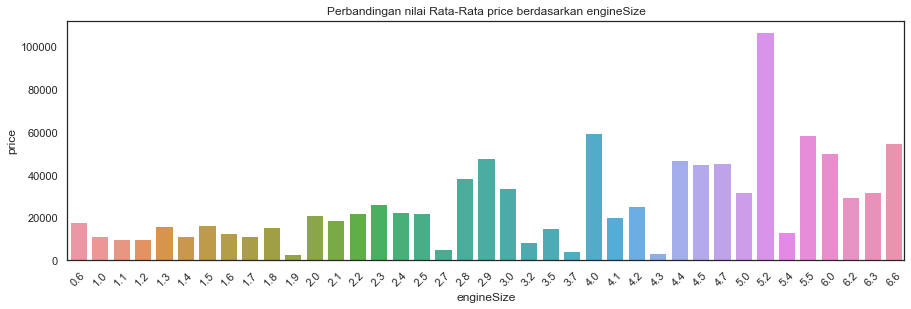

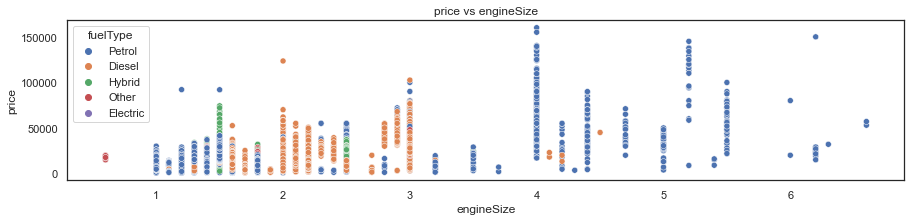

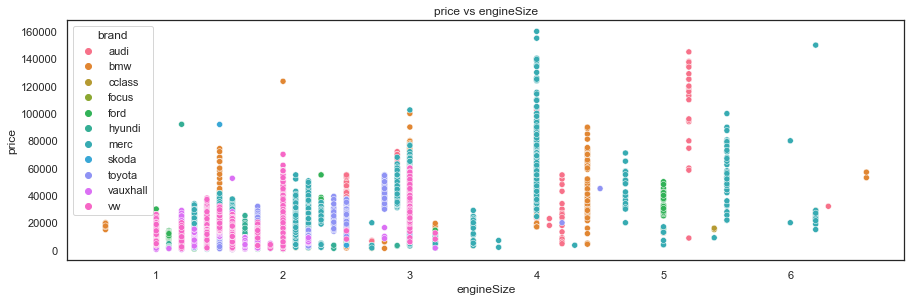

In [92]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
graph=sns.barplot(data=df, x='engineSize', y='price', ci=None)
plt.title('Perbandingan nilai Rata-Rata price berdasarkan engineSize')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(3,1,2)
sns.scatterplot(data=df, x='engineSize', y='price', hue='fuelType')
plt.title('price vs engineSize') 
plt.show()

plt.figure(figsize=(15,15))
plt.subplot(3,1,3)
sns.scatterplot(data=df, x='engineSize', y='price', hue='brand')
plt.title('price vs engineSize') 
plt.show()

**Kesimpulan Uji 4 :**

1. Volume total silinder mesin pengaruh terhadap penentuan harga jual mobil, dimana semakin besar nilai volume total silinder mesin maka nilai jual mobil akan semakin tinggi.
2. Pada data ini, secara umum digambarkan bahwa:
    * mobil dengan tipe bahan bakar bakar Petrol memiliki sebaran nilai _engineSize_ dan harga jual yg paling variatif; dari harga paling rendah hingga paling tinggi.
    * mobil dengan tipe bahan bakar bakar Diesel dan Hybrid memiliki sebaran nilai _engineSize_ yg relatif menengah tetapi memiliki range harga jual yg relatif rendah hingga tidak terlalu tinggi.

#### Uji 5 : _price_ vs _age_

Hipotesis:

Ho: rata-rata harga mobil di tiap umur bernilai sama

Ha: rata-rata harga mobil di tiap umur setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana

In [112]:
ages=list(df['age'].unique())

In [113]:
stats,pval = kruskal(*[df[df['age'] == i]['price'] for i in ages])

print('Nilai statistic:',stats)
print('Nilai p-value:',pval)

#conclusion
if pval <= 0.05:
    print('Tolak Ho, dapat dikatakan rata-rata harga mobil di tiap umur setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana.')
else:
    print('Terima Ho, dapat dikatakan rata-rata harga mobil di tiap umur bernilai sama.')

Nilai statistic: 42088.4265469715
Nilai p-value: 0.0
Tolak Ho, dapat dikatakan rata-rata harga mobil di tiap umur setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana.


**Korelasi :**

In [114]:
round(df['price'].corr(df['age'],method='spearman'),6)

-0.606563

**Analisa Korelasi :**

* Fitur _price_ memiliki korelasi **moderate** serta **berbanding Terbalik** dengan fitur _age_, dimana nilai korelasinya adalah 0.60647 dengan arah negatif.
* Berdasarkan hal ini dapat dikatakan bahwa **semakin tinggi nilai _age_** dari mobil akan menyebabkan **nilai _price_ semakin rendah**.

**Visualisasi :**

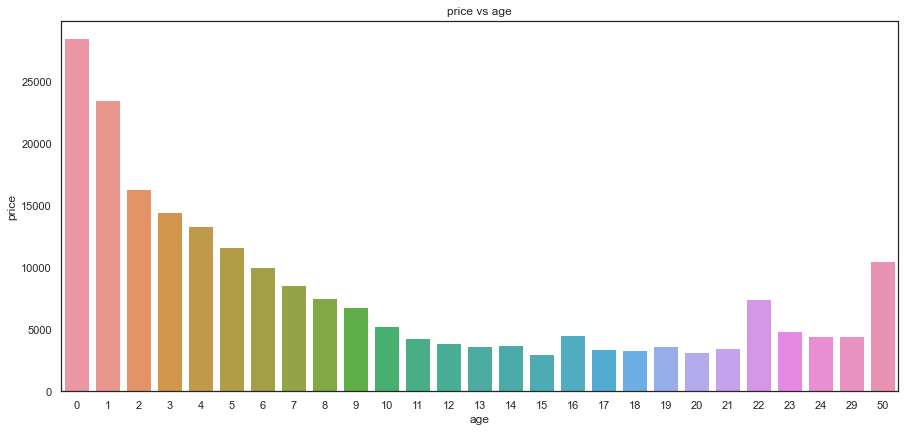

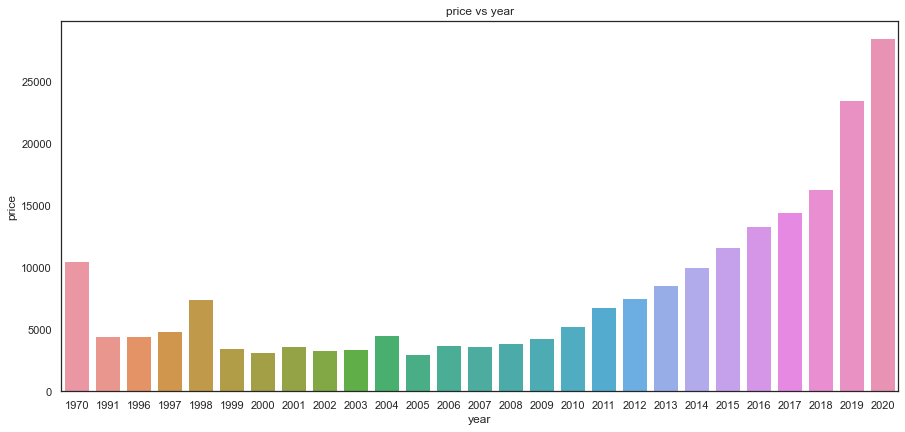

In [115]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.barplot(data=df, x='age', y='price', ci=None)
plt.title('price vs age')
plt.show()

plt.figure(figsize=(15,15))
plt.subplot(2,1,2)
sns.barplot(data=df, x='year', y='price', ci=None)
plt.title('price vs year')
plt.show()

**Kesimpulan Uji 5 :**

1. Umur beserta tahun produksi mobil memiliki pengaruh besar terhadap penentuan harga jual mobil, dimana semakin muda umur mobil maka semakin mahal harga mobilnya.
2. Pada data ini, secara umum digambarkan bahwa:
    * mobil dengan umur 0 tahun atau mobil dengan tahun produksi 2020 memiliki rata-rata harga jual yg lebih tinggi dibanding mobil yg lebih tua atau mobil dengan tahun produksi sebelumnya.
    * mobil dengan umur 50 tahun (tahun produksi 1970) memiliki harga jual yg relatif cukup tinggi jika dibandingkan dengan mobil berumur lainnya, hal ini kemungkinan dikarenakan mobil tersebut merupakan mobil antik / mobil klasik sehingga memiliki nilai historis sebagai variabel perhitungan lain.

#### Uji 6 : _price_ vs _transmission_ 

Hipotesis:

Ho: rata-rata harga mobil tiap tipe transmisi saling bernilai sama 

Ha: rata-rata harga mobil tiap tipe transmisi setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana

In [116]:
transm=list(df['transmission'].unique())

In [117]:
stats,pval = kruskal(*[df[df['transmission'] == i]['price'] for i in transm])

print('Nilai statistic:', stats)
print('Nilai p-value:', pval)

#conclusion
if pval <= 0.05:
    print('Tolak Ho, dapat dikatakan rata-rata harga mobil tiap tipe transmisi setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana.')
else:
    print('Terima Ho, dapat dikatakan rata-rata harga mobil tiap tipe transmisi saling bernilai sama.')

Nilai statistic: 39629.99635838735
Nilai p-value: 0.0
Tolak Ho, dapat dikatakan rata-rata harga mobil tiap tipe transmisi setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana.


**Visualisasi :**

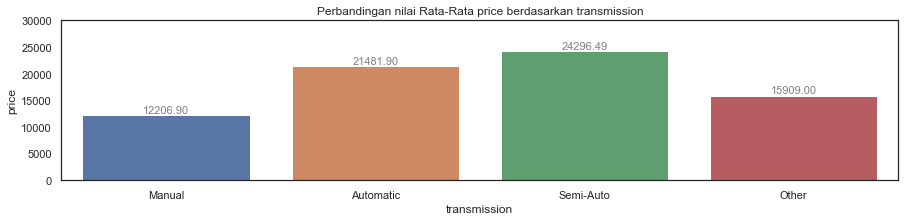

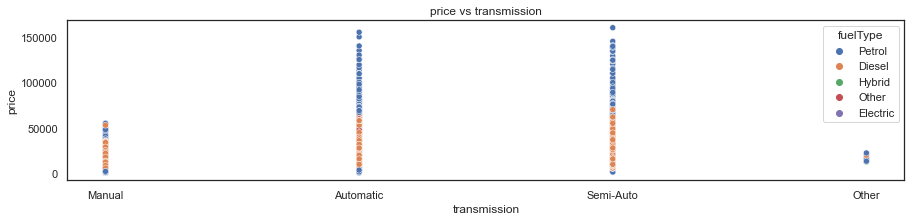

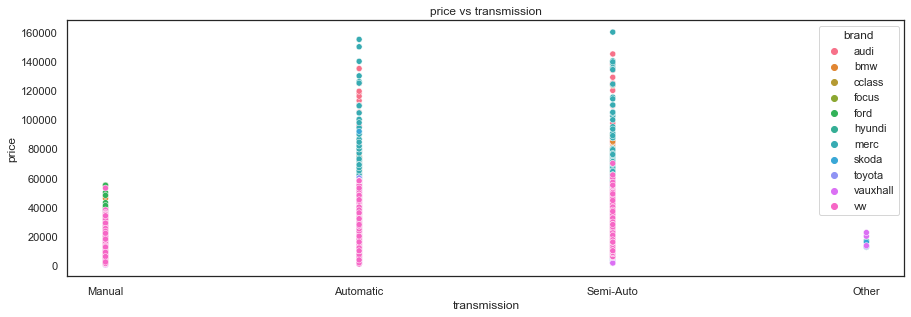

In [118]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
graph=sns.barplot(data=df, x='transmission', y='price', ci=None)
for p in graph.patches:
    height = p.get_height()
    graph.annotate("%.2f" % height, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0,5),
                textcoords='offset points')
plt.ylim(0, 30000)    
plt.title('Perbandingan nilai Rata-Rata price berdasarkan transmission') 
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(3,1,2)
sns.scatterplot(data=df, x='transmission', y='price', hue='fuelType')
plt.title('price vs transmission') 
plt.show()

plt.figure(figsize=(15,16))
plt.subplot(3,1,3)
sns.scatterplot(data=df, x='transmission', y='price', hue='brand')
plt.title('price vs transmission') 
plt.show()

**Kesimpulan Uji 6 :**

1. Jenis transmisi memiliki pengaruh besar terhadap penentuan harga jual mobil, dimana mobil dengan jenis transmisi _Semi-Auto_ memiliki rata-rata harga jual yg lebih tinggi dibanding mobil dengan jenis transmisi lainnya sedangkan mobil dengan jenis transmisi _Manual_ memiliki rata-rata harga jual yg paling rendah dibanding mobil dengan jenis transmisi lainnya.
2. Pada data ini, secara umum digambarkan bahwa sebaran jenis mobil dengan masing-masing jenis bahan bakar terhadap masing-masing tipe transmisi tersebar dengan cukup merata.

#### Uji 7 : _price_ vs _fuelType_

Hipotesis:

Ho: rata-rata harga mobil tiap jenis bahan bakar saling bernilai sama 

Ha: rata-rata harga mobil tiap jenis bahan bakar setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana

In [119]:
fuel=list(df['fuelType'].unique())

In [120]:
stats,pval = kruskal(*[df[df['fuelType'] == i]['price'] for i in fuel])

print('Nilai statistic:', stats)
print('Nilai p-value:', pval)

#conclusion
if pval <= 0.05:
    print('Tolak Ho, dapat dikatakan rata-rata harga mobil tiap jenis bahan bakar setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana.')
else:
    print('Terima Ho, dapat dikatakan rata-rata harga mobil tiap jenis bahan bakar saling bernilai sama.')

Nilai statistic: 8200.630030160853
Nilai p-value: 0.0
Tolak Ho, dapat dikatakan rata-rata harga mobil tiap jenis bahan bakar setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana.


**Visualisasi :**

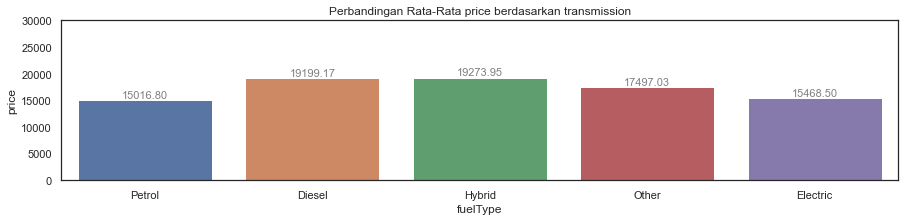

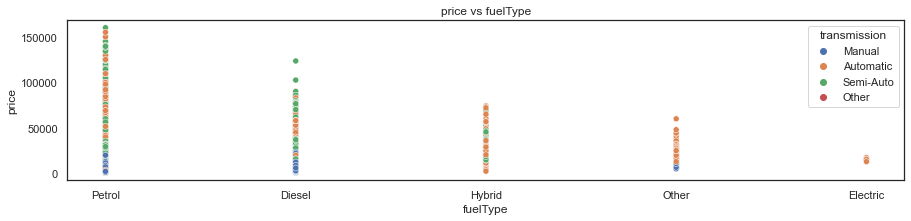

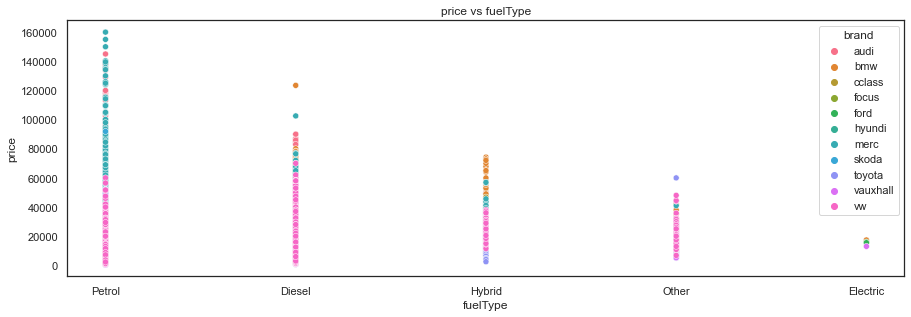

In [103]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
graph=sns.barplot(data=df, x='fuelType', y='price', ci=None)
for p in graph.patches:
    height = p.get_height()
    graph.annotate("%.2f" % height, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0,5),
                textcoords='offset points')
plt.ylim(0, 30000)    
plt.title('Perbandingan Rata-Rata price berdasarkan transmission') 
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(3,1,2)
sns.scatterplot(data=df, x='fuelType', y='price', hue='transmission')
plt.title('price vs fuelType') 
plt.show()

plt.figure(figsize=(15,16))
plt.subplot(3,1,3)
sns.scatterplot(data=df, x='fuelType', y='price', hue='brand')
plt.title('price vs fuelType') 
plt.show()

**Kesimpulan Uji 7 :**

Jenis transmisi memiliki pengaruh kecil terhadap penentuan harga jual mobil, dimana mobil dengan tipe bahan bakar _Hybrid_ dan _Diesel_ memiliki rata-rata harga jual yg lebih tinggi dibanding mobil dengan tipe bahan bakar lainnya sedangkan mobil dengan tipe bahan bakar _Petrol_ memiliki rata-rata harga jual yg paling rendah dibanding mobil dengan tipe bahan bakar lainnya.

#### Uji 8 : _fuelType_ vs _mpg_

Hipotesis:

Ho: rata-rata nilai mpg mobil tiap jenis bahan bakar saling bernilai sama 

Ha: rata-rata nilai mpg mobil tiap jenis bahan bakar setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana

In [122]:
stats,pval = kruskal(*[df[df['fuelType'] == i]['mpg'] for i in fuel])

print('Nilai statistic:', stats)
print('Nilai p-value:', pval)

#conclusion
if pval <= 0.05:
    print('Tolak Ho, dapat dikatakan rata-rata nilai mpg mobil tiap jenis bahan bakar setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana.')
else:
    print('Terima Ho, dapat dikatakan rata-rata nilai mpg mobil tiap jenis bahan bakar saling bernilai sama.')

Nilai statistic: 18444.4539983677
Nilai p-value: 0.0
Tolak Ho, dapat dikatakan rata-rata nilai mpg mobil tiap jenis bahan bakar setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana.


**Visualisasi :**

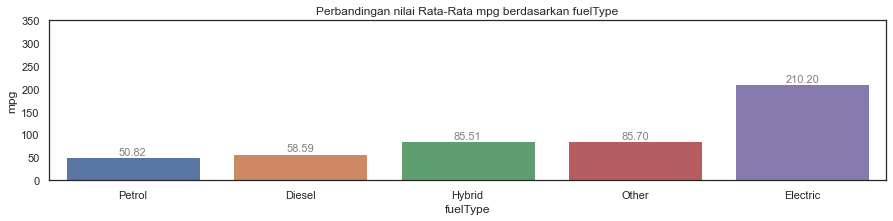

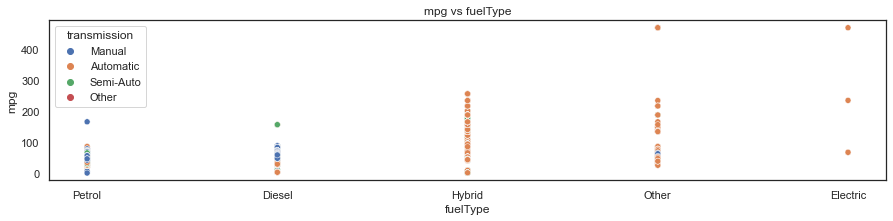

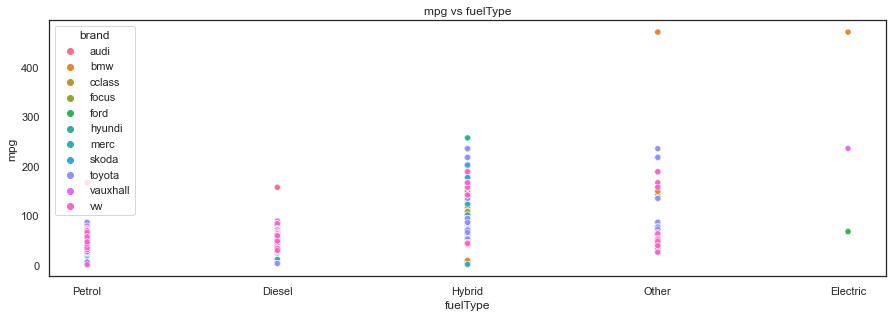

In [105]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
graph=sns.barplot(data=df, x='fuelType', y='mpg', ci=None)
for p in graph.patches:
    height = p.get_height()
    graph.annotate("%.2f" % height, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0,5),
                textcoords='offset points')
plt.ylim(0, 350)    
plt.title('Perbandingan nilai Rata-Rata mpg berdasarkan fuelType') 
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(3,1,2)
sns.scatterplot(data=df, x='fuelType', y='mpg', hue='transmission')
plt.title('mpg vs fuelType') 
plt.show()

plt.figure(figsize=(15,16))
plt.subplot(3,1,3)
sns.scatterplot(data=df, x='fuelType', y='mpg', hue='brand')
plt.title('mpg vs fuelType') 
plt.show()

**Kesimpulan Uji 8 :**

Jenis bahan bakar yg digunakan oleh suatu mobil dapat memengaruhi nilai _mpg_ nya, dimana mobil dengan jenis bahan bakar Electric memiliki nilai rata-rata _mpg_ yg paling tinggi dibandingkan mobil dengan jenis bahan bakar lainnya dan mobil dengan bahan bakar Petrol memiliki rata-rata nilai _mpg_ yg paling rendah dibanding mobil dengan jenis bahan bakar lainnya.

#### Uji 9 : _fuelType_ vs _tax_

Hipotesis:

Ho: rata-rata nilai tax mobil tiap jenis bahan bakar saling bernilai sama 

Ha: rata-rata nilai tax mobil tiap jenis bahan bakar setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana

In [124]:
stats,pval = kruskal(*[df[df['fuelType'] == i]['tax'] for i in fuel])

print('Nilai statistic:', stats)
print('Nilai p-value:', pval)

#conclusion
if pval <= 0.05:
    print('Tolak Ho, dapat dikatakan rata-rata nilai tax mobil tiap jenis bahan bakar setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana.')
else:
    print('Terima Ho, dapat dikatakan rata-rata nilai tax mobil tiap jenis bahan bakar saling bernilai sama.')

Nilai statistic: 4985.057499213834
Nilai p-value: 0.0
Tolak Ho, dapat dikatakan rata-rata nilai tax mobil tiap jenis bahan bakar setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana.


**Visualisasi :**

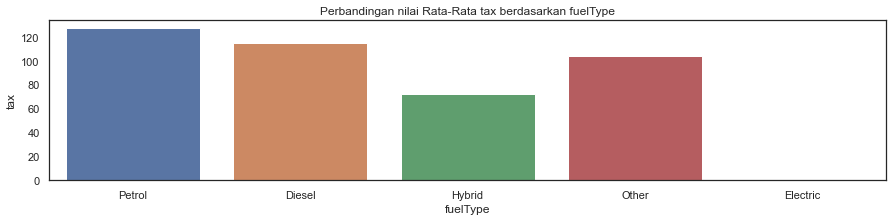

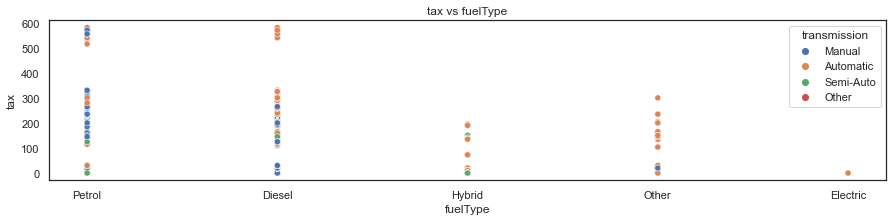

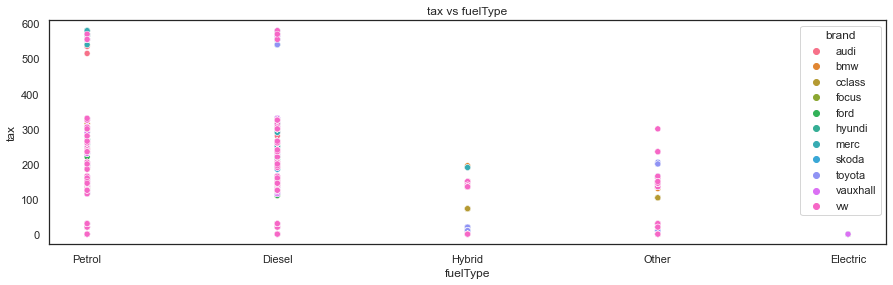

In [107]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
graph=sns.barplot(data=df, x='fuelType', y='tax', ci=None)
plt.title('Perbandingan nilai Rata-Rata tax berdasarkan fuelType') 
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(3,1,2)
sns.scatterplot(data=df, x='fuelType', y='tax', hue='transmission')
plt.title('tax vs fuelType') 
plt.show()

plt.figure(figsize=(15,14))
plt.subplot(3,1,3)
sns.scatterplot(data=df, x='fuelType', y='tax', hue='brand')
plt.title('tax vs fuelType') 
plt.show()

**Kesimpulan Uji 9 :**

Jenis bahan bakar mobil digunakan dapat memengaruhi nilai _tax_ nya, dimana mobil dengan jenis bahan bakar _Petrol_ memiliki nilai rata-rata _tax_ yg paling tinggi dibandingkan mobil dengan jenis bahan bakar lainnya, sedangkan mobil dengan bahan bakar _Electric_ memiliki rata-rata nilai _tax_ yg paling rendah dibandingkan mobil dengan jenis bahan bakar lainnya.

#### Uji 10 : _tax_ vs _mpg_

**Korelasi :**

In [125]:
round(df['tax'].corr(df['mpg'],method='spearman'),6)

-0.564331

**Analisa Korelasi :**

* Fitur _tax_ memiliki korelasi **moderate** serta **berbanding Terbalik** dengan fitur _mpg_, dimana nilai korelasinya adalah 0.564331 dengan arah negatif.
* Berdasarkan hal ini dapat dikatakan bahwa **semakin tinggi nilai _mpg_** dari mobil akan menyebabkan **nilai _tax_ semakin rendah**.

**Visualisasi :**

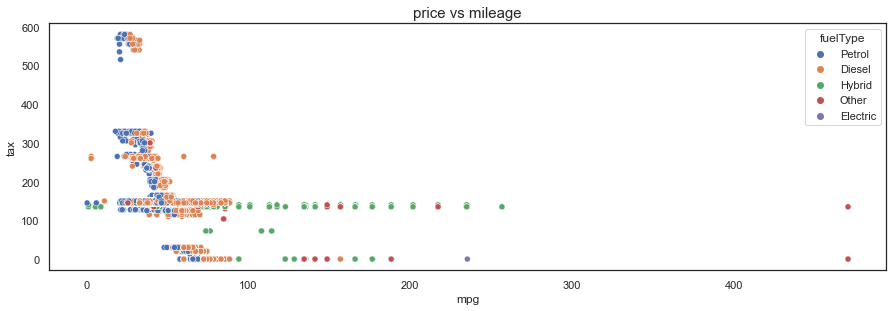

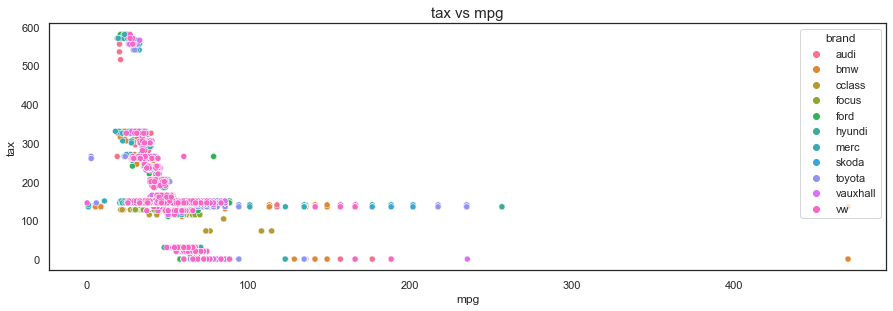

In [126]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.scatterplot(data=df, x='mpg', y='tax', hue='fuelType')
plt.title('price vs mileage', size=15)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
sns.scatterplot(data=df, x='mpg', y='tax', hue='brand')
plt.title('tax vs mpg', size=15)
plt.show()

**Kesimpulan Uji 10 :**

Total jarak tempuh mobil berdasarkan total konsumsi bahan bakar yg digunakan memiliki pengaruh terhadap nilai pajak mobil, dimana secara umum mobil yg irit bahan bakar memiliki nilai pajak yg lebih rendah dibanding mobil yg lebih boros bahan bakar. Hal ini ada hubungannya dengan jenis bahan bakar yg digunakan oleh mobil tsb, dimana secara umum mobil dengan jenis bahan bakar _Electric_ memiliki nilai _mpg_ yg lebih tinggi dibandingkan mobil dengan jenis bahan bakar lainnya sehingga mobil ini memiliki nilai _tax_ yg paling rendah.

#### Uji 11 : _mileage_ vs _age_

**Korelasi :**

In [69]:
round(df['mileage'].corr(df['age'],method='spearman'),6)

0.81401

**Analisa Korelasi :**

* Fitur _mileage_ memiliki korelasi **strong** serta **berbanding Lurus** dengan fitur _age_, dimana nilai korelasinya adalah 0.81401 dengan arah positif.
* Berdasarkan hal ini dapat dikatakan bahwa **semakin tinggi nilai _age_** dari mobil akan menyebabkan **nilai _mileage_ semakin tinggi**.

**Visualisasi :**

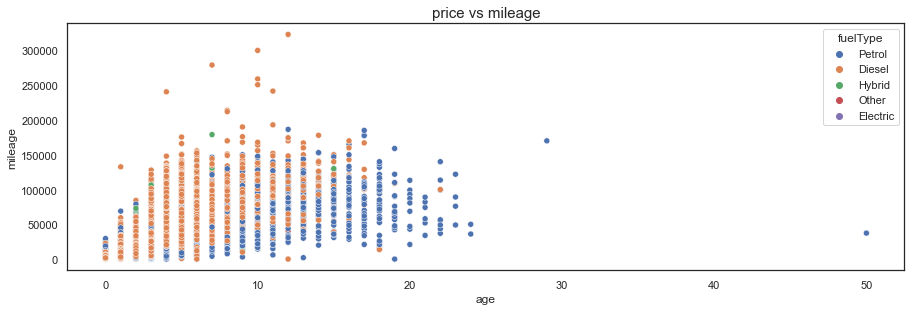

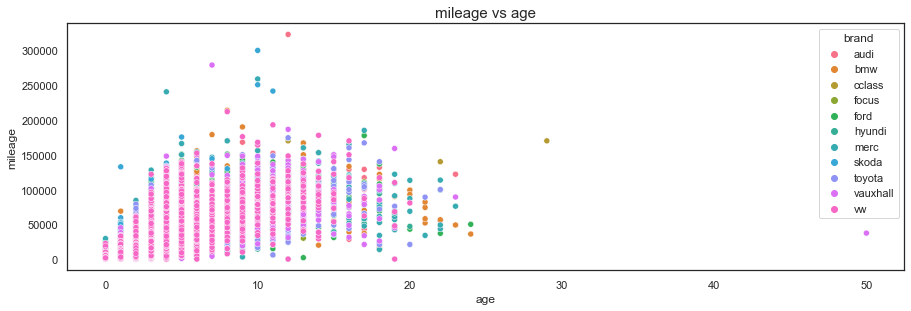

In [108]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.scatterplot(data=df, x='age', y='mileage', hue='fuelType')
plt.title('price vs mileage', size=15)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
sns.scatterplot(data=df, x='age', y='mileage', hue='brand')
plt.title('mileage vs age', size=15)
plt.show()

**Kesimpulan Uji 11 :**

Umur dari mobil memiliki pengaruh terhadap total jarak yg telah ditempuh, dimana secara umum mobil yg sudah berumur tua telah menempuh jarak yg lebih banyak dibandingkan mobil yg masih muda. Pada mobil dengan jenis bahan bakar _Petrol_ memiliki sebaran data yg lebih merata antara mobil berumur muda dengan jarak tempuh sedikit hingga mobil berumur tua dengan jarak tempuh tinggi dibandingkan mobil dengan jenis bahan bakar lainnya.

#### Uji 12 : _age_ vs _tax_

**Korelasi :**

In [76]:
round(df['age'].corr(df['tax'],method='spearman'),6)

-0.338549

**Analisa Korelasi :**

* Fitur _tax_ memiliki korelasi **moderate** serta **berbanding Terbalik** dengan fitur _age_, dimana nilai korelasinya adalah 0.338549 dengan arah negatif.
* Berdasarkan hal ini dapat dikatakan bahwa **semakin tinggi nilai _age_** dari mobil akan menyebabkan **nilai _tax_ semakin rendah**.

**Visualisasi :**

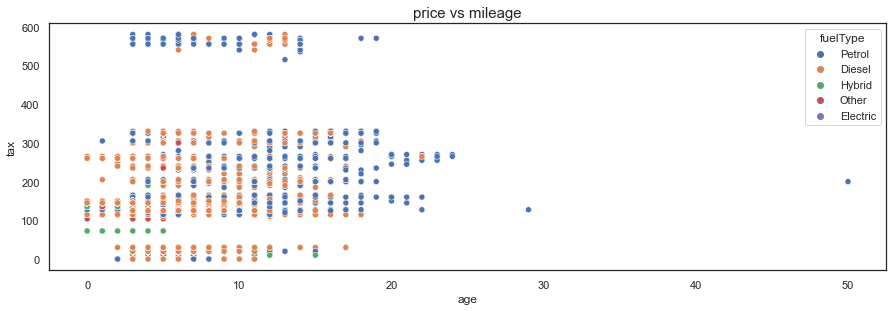

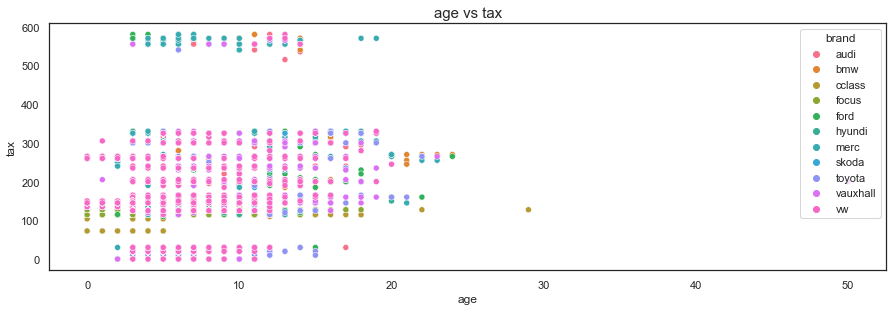

In [143]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.scatterplot(data=df, x='age', y='tax', hue='fuelType')
plt.title('price vs mileage', size=15)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
sns.scatterplot(data=df, x='age', y='tax', hue='brand')
plt.title('age vs tax', size=15)
plt.show()

**Kesimpulan Uji 12 :**

Umur dari mobil memiliki pengaruh terhadap nilai pajak mobil, dimana secara umum mobil yg sudah berumur tua memiliki nilai pajak yg lebih rendah dibandingkan mobil yg masih muda. Pada mobil dengan jenis bahan bakar _Petrol_ memiliki sebaran data yg lebih merata antara mobil berumur muda dengan nilai pajak yg rendah hingga mobil berumur tua dengan nilai pajak yg tinggi dibandingkan mobil dengan jenis bahan bakar lainnya.

#### Uji 13 : Year vs Tax

Hipotesis:

Ho: rata-rata nilai pajak mobil tiap tahun sama

Ha: rata-rata nilai pajak mobil tiap tahun setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana

In [210]:
stats,pval = kruskal(*[df[df['year'] == i]['tax'] for i in years])

print('Nilai statistic:', stats)
print('Nilai p-value:', pval)

#conclusion
if pval <= 0.05:
    print('Tolak Ho, dapat dikatakan rata-rata nilai pajak tiap tahun setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana.')
else:
    print('Terima Ho, dapat dikatakan rata-rata nilai pajak tiap tahun sama.')

Nilai statistic: 20942.03502791971
Nilai p-value: 0.0
Tolak Ho, dapat dikatakan rata-rata nilai pajak tiap tahun setidaknya ada 1 yang berbeda tapi kita tidak tahu yg mana.


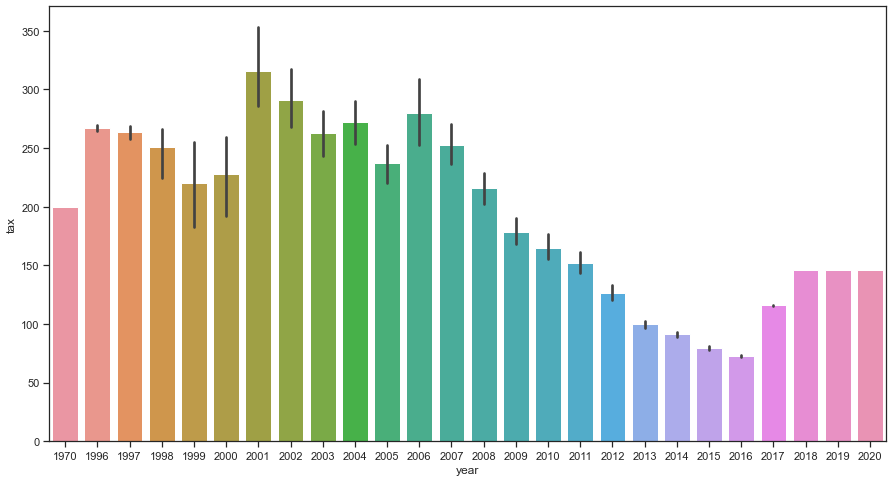

In [60]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='year', y='tax')
plt.show()

>Rata-rata nilai pajak mobil bekas pada tahun 2001 secara umum mulai menurun untuk tahun-tahun berikutnya dan mulai meningkat kembali pada tahun 2017.

<AxesSubplot:xlabel='year', ylabel='count'>

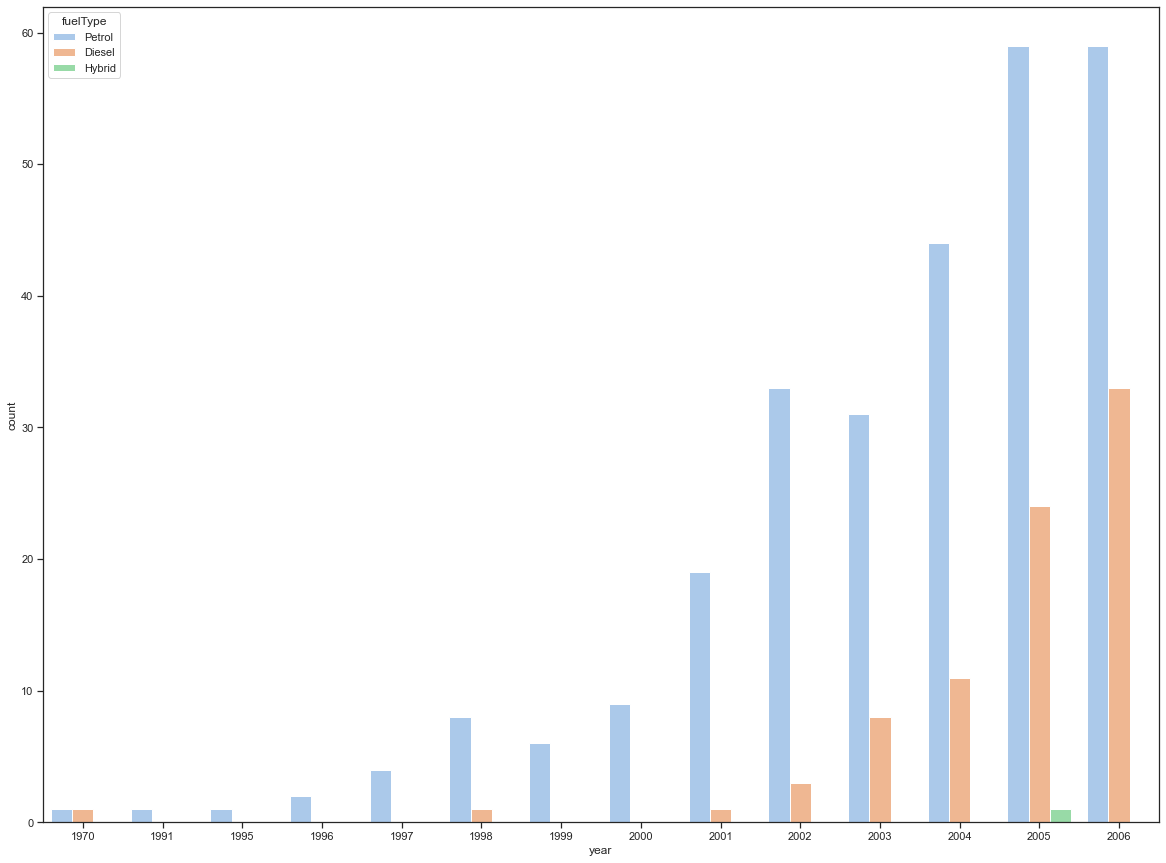

In [74]:
plt.figure(figsize=(20,15))
sns.countplot(x="year", hue="fuelType", data=df[df['year']<2007])

<AxesSubplot:xlabel='year', ylabel='count'>

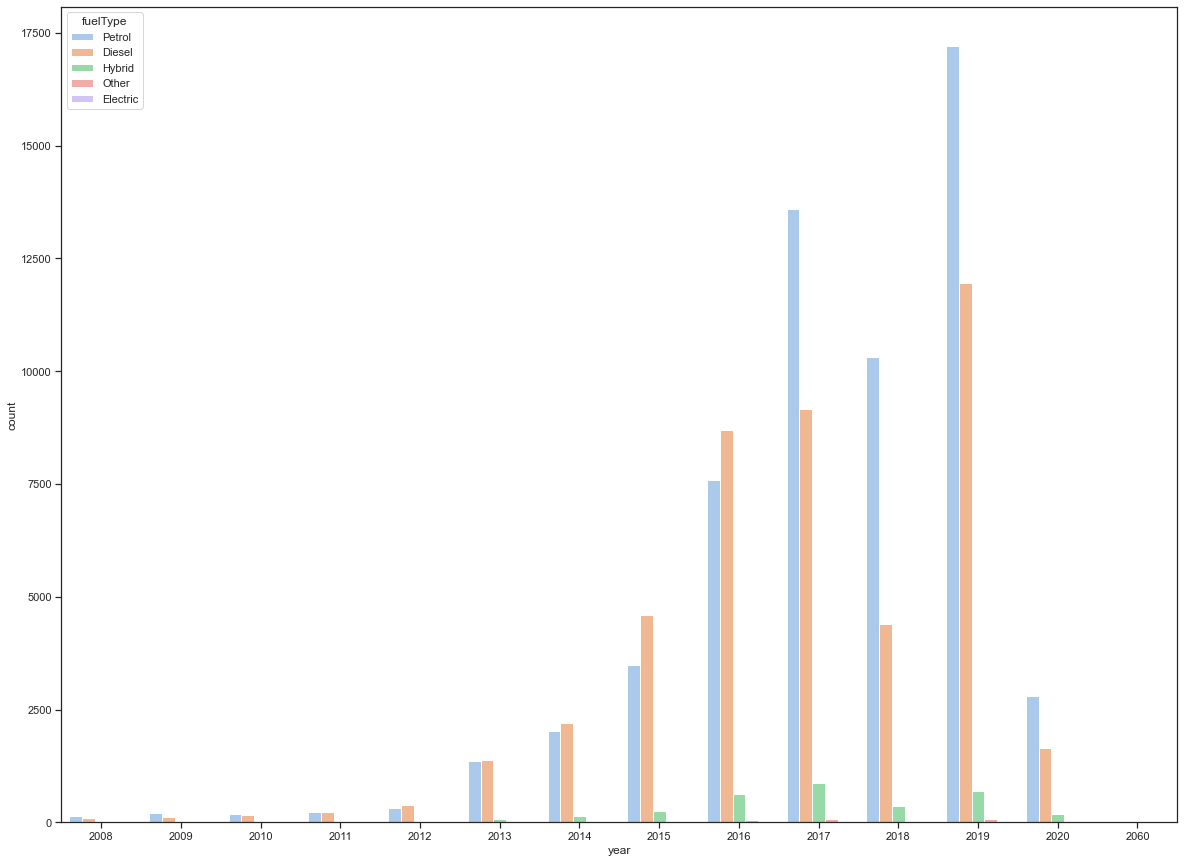

In [75]:
plt.figure(figsize=(20,15))
sns.countplot(x="year", hue="fuelType", data=df[df['year']>2007])